#### Lib Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import functions as f
import visualise as vis
import algorythm as alg
import math
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

In [2]:
url = "https://pastebin.com/raw/j30qh61S"
#resp = urllib.request.urlopen(url_data)
data1 = pd.read_csv(r'./dataset/2_18.02-25.02.csv', header=0, sep =',')

In [3]:
data1 = data1.loc[data1['temperatureAvg'] > 1]
data1 = data1.loc[data1['temperatureSdv'] > 1]
#data1 = data1.loc[data1['temperatureSdv'] < 2000]
data1 = data1.loc[data1['temperatureMax'] > 1]
data1 = data1.loc[data1['temperatureMax'] < 10000]
data1 = data1.loc[data1['temperatureAvgExt'] < 4000]
data1 = data1.loc[data1['temperatureMin'] > 1]
data1 = data1.loc[data1['temperatureAvgExt'] > 1]
data1 = data1.loc[data1['temperatureSdvExt'] > 1]
data1 = data1.loc[data1['id']  > 1]
#data1 = data1.loc[data1['distance']  > 1]
data1 = data1.loc[data1['temperatureAvg'] < 3500]
#data1 = data1.loc[data1['temperatureAvg'] > 2400]
#data1 = data1.loc[data1['mappingError'] < 0.1]
#data1 = data1.loc[data1['temperatureSdv'] < 500]

Text(0.5, 0, 'Время')

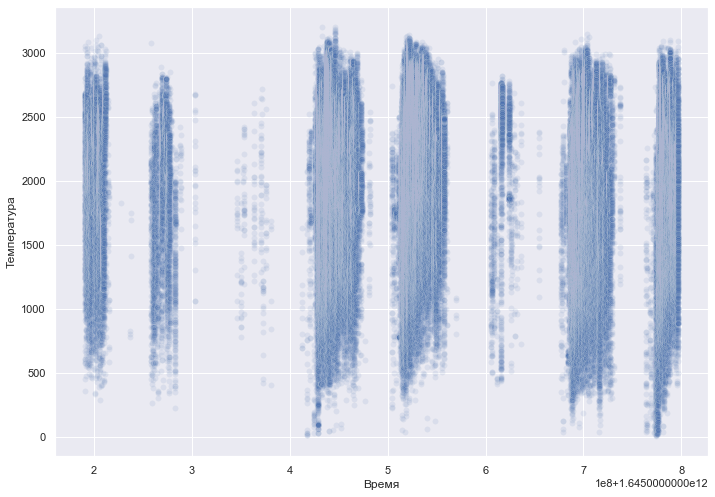

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.scatterplot(data = data1, x="ts", y="temperatureAvg",  alpha = 0.1)
plot.set_ylabel('Температура')
plot.set_xlabel('Время')

In [31]:
data1

,id,distance,ts,x,y,w,h,ts_ir,x_ir,y_ir,w_ir,h_ir,temperatureAvg,temperatureSdv,temperatureMin,temperatureMax,temperatureAvgExt,temperatureSdvExt,mappingError,markup
0,7336,830.7697,1645190488951,0.621875,0.418519,0.027083,0.059259,1645190488883,0.661458,0.461806,0.036458,0.059028,1304.656,452.05840,719.0,2237.0,1122.0520,306.2787,0.010122,-1
1,7336,939.1313,1645190489211,0.621875,0.431482,0.023958,0.053704,1645190489083,0.661458,0.468750,0.033854,0.055556,1060.984,399.47300,521.0,2257.0,1343.3300,224.6671,0.010122,-1
2,7336,939.1313,1645190489402,0.613542,0.429630,0.023958,0.053704,1645190489285,0.656250,0.472222,0.033854,0.055556,1181.807,396.06760,635.0,2225.0,1227.0140,352.8327,0.010122,-1
3,7336,830.7697,1645190489601,0.602083,0.431482,0.027083,0.057407,1645190489483,0.643229,0.472222,0.036458,0.059028,1295.806,433.12310,548.0,2374.0,979.9309,402.8344,0.010122,-1
4,7336,830.7697,1645190489790,0.588542,0.431482,0.027083,0.057407,1645190489683,0.627604,0.472222,0.036458,0.059028,1229.534,510.88820,507.0,2340.0,1103.3170,447.8614,0.010122,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389442,42863,284.2108,1645796971358,0.487500,0.590741,0.079167,0.203704,1645796971569,0.486979,0.628472,0.104167,0.201389,2235.091,154.57190,1176.0,2507.0,1941.3700,392.7528,0.011525,-1
389443,42864,222.6805,1645796972024,0.509375,0.507407,0.101042,0.300000,1645796971970,0.515625,0.548611,0.132812,0.295139,2111.963,296.01960,1191.0,2496.0,1952.7850,306.4780,0.011060,-1
389444,42864,222.6805,1645796972024,0.509375,0.507407,0.101042,0.300000,1645796972170,0.515625,0.548611,0.132812,0.295139,2145.802,241.91150,1151.0,2501.0,1705.0490,360.5752,0.011060,-1
389445,42864,222.6805,1645796972024,0.509375,0.507407,0.101042,0.300000,1645796972170,0.515625,0.548611,0.132812,0.295139,2219.353,76.30619,1888.0,2501.0,1624.6680,326.1540,0.011060,-1


In [ ]:
da

In [20]:
model = f.Model(data1, 10)
#model.filter(2)
data2 = model.df_all

In [39]:
x = pd.concat([data2, data1]).drop_duplicates(keep=False)

In [22]:
data_mean = f.mean_list(data2)

Text(0.5, 0, 'ID')

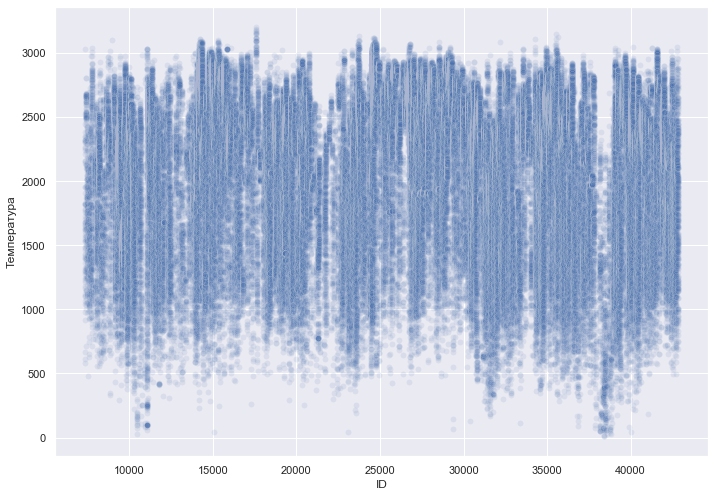

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.scatterplot(data = data2, x="id", y="temperatureAvg",  alpha = 0.1)
plot.set_ylabel('Температура')
plot.set_xlabel('ID')

<AxesSubplot:xlabel='ts', ylabel='temperatureAvg'>

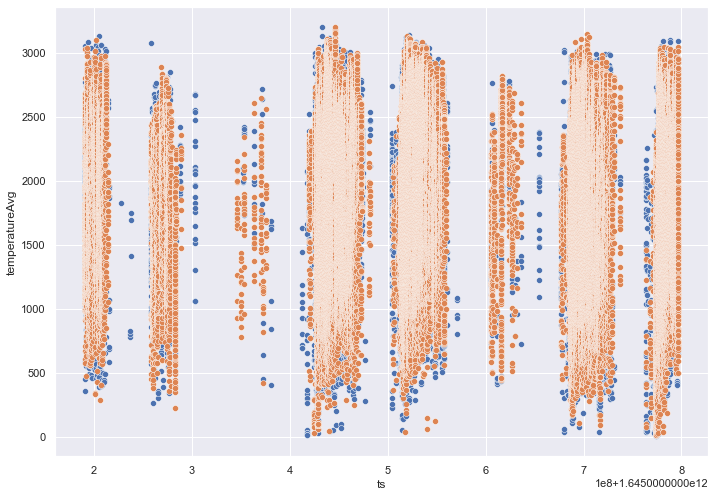

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data = x, x="ts", y="temperatureAvg"  , palette='Blues')
sns.scatterplot(data = data2, x="ts", y="temperatureAvg")



In [24]:
clusters = alg.clusterise(data1,number_of_clusters=5)
clusters1 = alg.clusterise(data2,number_of_clusters=5)

Text(0.5, 1.0, 'Кластеризация событий по времени')

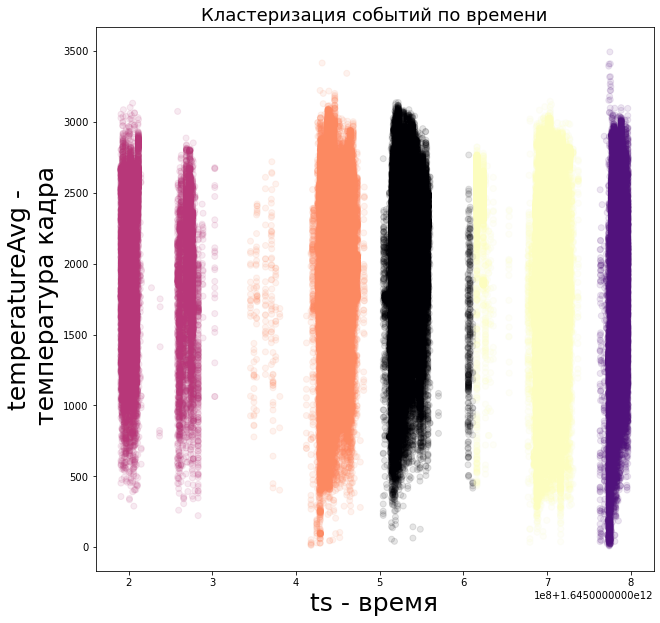

In [11]:
fig = plt.figure(figsize=(10, 10))
plot = fig.add_subplot(111)
plot.scatter(data1['ts'], data1['temperatureAvg'], c = data1['cluster'],alpha=0.1, cmap = "magma")
plot.set_xlabel('ts - время', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'black')
plot.set_title('Кластеризация событий по времени',  fontsize = 18, color = 'black')

In [21]:
main_mean_list = f.mean_list(data1)
algo_set_avg = alg.create_trend(main_mean_list, close_data_size = 50, ratio = 0)
mean_set_avg = alg.create_sdv_trend(main_mean_list, algo_set_avg, close_data_size= 10000, ratio=0)
border = algo_set_avg + mean_set_avg